# Chapter 4 - Building Good Training Sets – Data Pre-Processing

1. 결측 데이터 제거하고 대체하기

2. 범주형 데이터를 머신러닝 분석형태로 변환하기

3. 모델선정을 위해 연관성 있는 feature 선택하기

## 1 결측 데이터 다루기
숫자 데이터 다루기

### 01 Import Data

In [1]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data)); df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
# 각 column 에 대한 Nan (None)의 갯수
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

### 02 NaN(None) 제거하기

In [4]:
# NaN row 제거하고 출력
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
df.dropna(how='all')  # row 전체가 NaN일때 제거

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
df.dropna(thresh=4)  # row에 '4'개 이상 non-NaN이 있을 때

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(subset=['C'])  # 'C' column 에 NaN 가 있으면 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [8]:
# NaN column 제거하고 출력
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


### 03 결측값의 보정
sklearn, Imputer

In [9]:
from sklearn.preprocessing import Imputer

# 해당 Row(axis=0)의 'mean' 값으로, 'NaN'을 채우기
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)         # Imputer() : 함수를 학습
imr.transform(df.values)  # transform : 데이터 변환을 적용

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

## 2 범주형 데이터 다루기
범위 데이터를 다루기

### 01 Import data

In [10]:
import pandas as pd
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']; df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### 02 순위형 feature mapping
DataFrame['컬럼명'].map( { 원본data : 변경data })

In [11]:
# { dict } 으로 객체 변경하기
size_mapping = {'XL': 3, 'L': 2,'M': 1}

df['size'] = df['size'].map(size_mapping); df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [12]:
# 역매핑 { dict } 생성하기
ize_mapping = {v: k for k, v in size_mapping.items()}

# df['size'] = df['size'].map(ize_mapping)
df['size'].map(ize_mapping) 

0     M
1     L
2    XL
Name: size, dtype: object

### 03 분류 레이블 인코딩

In [13]:
# { dict } 객체 생성하기
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
# Counting 으로 데이터 바꾸기 (외래key)
df['classlabel'] = df['classlabel'].map(class_mapping); df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [15]:
# 역매핑 { dict } 실행
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### 03 LabelEncoder 를 활용하기
LabelEncoder() 로 'classlabel'을 외래키로 변경

In [16]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
df['classlabel'] = class_le.fit_transform(df['classlabel'].values)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [17]:
df['classlabel'] = class_le.inverse_transform(df['classlabel'].values)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### 04 명목형 feature -->  one-hot-encoding 수행하기
LabelEncoder() , OneHotEncoder()

In [18]:
# LabelEncoder() 로 'color'컬럼 데이터를 'one hot encoding' 적용하기
X = df[['color', 'size', 'price']].values; X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [19]:
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0]);  X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [20]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [21]:
# OneHotEncoder() 모듈로 'one hot encoding' 적용하기
# 이떄는 Integer 만 변환가능 , String 을 직접 넣으니까 안된다 ㅜㅜ..
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
# ohe.fit_transform(df['color']).toarray()
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [22]:
# 개별 element 별 columns을 통해서 one-hot-encoding 을 출력
pd.get_dummies(df)

,size,price,color_blue,color_green,color_red,classlabel_class1,classlabel_class2
0,1,10.1,0.0,1.0,0.0,1.0,0.0
1,2,13.5,0.0,0.0,1.0,0.0,1.0
2,3,15.3,1.0,0.0,0.0,1.0,0.0


In [23]:
df.columns.tolist()[:3]

['color', 'size', 'price']

In [24]:
# df 중 .get_dummies 를 적용할 범위를 제한
pd.get_dummies(df[df.columns.tolist()[:3]])

,size,price,color_blue,color_green,color_red
0,1,10.1,0.0,1.0,0.0
1,2,13.5,0.0,0.0,1.0
2,3,15.3,1.0,0.0,0.0


## 3 Train, Test 데이터 나누기
70% , 30%

In [25]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
df_wine.shape

(178, 14)

In [26]:
# 와인의 생산지역 분류 [1,2,3]
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [27]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
# Train/ Test 데이터로 분할하기
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
print(" X_train {}, X_test {}\n y_train {}, y_test{} ".
      format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

 X_train (124, 13), X_test (54, 13)
 y_train (124,), y_test(54,) 


## 4 Feature 를 동일한 스케일로 가져오기
머신러닝 중 CNN의 이미지 분석등의 경우 '동일한 scale'에 더 잘 작동한다

### 01 Normalize 
Min Max Scaler 정규화 (정규분포 데이터로 재정렬)

In [30]:
# 최대-최소 스케일링을 활용한 Normalize (정규화)
# 최대/ 최소값 기준으로 개별 데이터를 0 ~ 1 사이의 값으로 치환
# X(i) = Xi - Xmin / (Xmax - Xmin)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
print(X_train_norm.shape,  X_train_norm.max(), X_train_norm.min())

(124, 13) 1.0 0.0


In [31]:
X_test_norm = mms.transform(X_test) 
X_test_norm.shape

(54, 13)

### 02 Standardized
해당 데이터의 고유한 평균과 /표준편차로 데이터 재정렬

In [32]:
# Standard (평균화)
# 수식 : (요소값 - 평균) / 표준편차
# 설명 : 0 ~ 100의 값으로 변환, 동질 데이터 단위가 너무 크거나 작을 떄
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
print("{}  X_train max:{:.2f}  min:{:.2f}".format( X_train_std.shape , X_train_std.max(), X_train_std.min()))

(124, 13)  X_train max:4.24  min:-3.64


In [33]:
X_test_std = stdsc.transform(X_test)
"{:.2f}".format(X_test_std.max())

'3.42'

## 5 의미있는 Feature의 선택
Train Accuracy > test Accuracy : 과적합(Overfitting)의 문제

In [34]:
# 더 많은 Train 데이터를 수집한다
# '정규화(Normalize)'에 의한 복잡도에 벌점을 부과한다
# 데이터의 '차원축소'를 한다
# '정규식'의 더 적은 파라미터를 갖는 단순한 모델을 선택한다

### 01 L1(벌칙) 정규화를 포함하는 희소솔루션
L1 정규화 : 희소 feature의 vector들을 도출한다 (대다수는 0의 '가중치'를 갖는다) - 같은 거리

L2 정규화 : 큰 값의 개별 가중치에 '벌점'을 부과

<img src="https://qph.ec.quoracdn.net/main-qimg-11f828e592317cc6cef7f30b941f3796" align="left">

In [35]:
# L1 : 훈련 데이터에 대한 '비용함수'를 '최소화'하는 '가중계수'의 조합을 찾는다.
# Train 데이터의 비용(overfitting)  + 정규화 벌칙 
# 벌칙 제약하 최소점 : 비용 분포(Beta), 정규화 분포(절대값 0 중심 원/마름모)가 만나는 최소점
# (a) 모델(L1) 이 더 가능성이 높고, 최소점이 희소해서 분석에 유리

In [36]:
ex = pd.DataFrame([0, 1, 2, 3, 4, 5])
# 표준화 컬럼 데이터 (standardize)
ex[1] = (ex[0] - ex[0].mean()) / ex[0].std(ddof=0)
# 정규화 컬럼 데이터 (normalize)
ex[2] = (ex[0] - ex[0].min()) / (ex[0].max() - ex[0].min())
ex.columns = ['input', 'standardized', 'normalized']; ex 

,input,standardized,normalized
0,0,-1.46385,0.0
1,1,-0.87831,0.2
2,2,-0.29277,0.4
3,3,0.29277,0.6
4,4,0.87831,0.8
5,5,1.46385,1.0


In [37]:
# L1 패널티를 갖는, 정규화 모델의 희소 솔루션 구현
# LogisticRegression(penalty = '')
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)

# 다중 분류 피팅 (One-vs-Rest)
# 희소솔루션의 절편 ( 분류1절편 (분류2/3을근거), 분류2절편 (분류1/3을 근거), 분류3절편 (분류 1/2근거))
lr.intercept_ 

array([-0.38386563, -0.15806101, -0.70043173])

In [38]:
# 3개 행의 가중계수와, 각 분류에 대한 1개의 가중벡터
print(lr.coef_.shape)
lr.coef_

(3, 13)


array([[ 0.28045596,  0.        ,  0.        , -0.02788704,  0.        ,
         0.        ,  0.71010575,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23614673],
       [-0.64404927, -0.06878784, -0.05721255,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.9267708 ,
         0.06022768,  0.        , -0.37106759],
       [ 0.        ,  0.06158399,  0.        ,  0.        ,  0.        ,
         0.        , -0.63543557,  0.        ,  0.        ,  0.49789873,
        -0.35838016, -0.57167014,  0.        ]])

In [39]:
print('Training accuracy : {:.4f}'.format(lr.score(X_train_std, y_train)))
print('Test accuracy     : {:.4f}'.format(lr.score(X_test_std, y_test)))

Training accuracy : 0.9839
Test accuracy     : 0.9815


### 02 다양한 feature를 통한 가중계수의 정규화 비교
wine 데이터를 L1 패털티를 활용한 Overfitting 피하기

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

In [41]:
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

In [42]:
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)

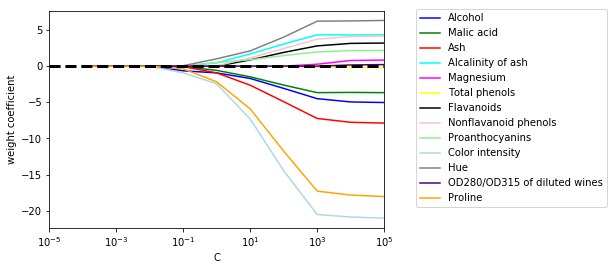

In [43]:
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()

In [ ]:
# C (정규화 파라미터의 역수) 가 0.1 이하면 0으로 수렴해 변별력이 떨어진다.

### 03 연속형 feature 선택 알고리즘
차원축소를 통한 Overfitting 피하기
1. feature 선택 : feature 일부를 선택 
2. feature 추출 : feature 집합에서 파생한 새로운 부분집합을 선택

In [ ]:
# 연속 데이터의 선택 알고리즘 적용

# feature 선택 : 잡음데이터를 제거하여 계산의 효율성을 높여준다 - 정규화 곤란한 데이터에 적합

# 전통적 방법 SBS (Sequential Backward Selection) : 
#       feature의 차원축소시 분류기 성능이 무너짐을 최소화 한다.
#       원하는 feature의 수만 포함할 때까지 feature를 제거
#       제거 평가함수로는 J(w)를 사용 - 제거 후 분류기 성능이 최소손실(argmaxJ(X-x)) 묶음을 추출한다

In [53]:
# SBS (Sequential Backward Selection) algorithm : 구현된 모델이 없어서 새로 작성
from sklearn.base import clone
from itertools import combinations          # feature의 부분집합을 선별
import numpy as np
from sklearn.metrics import accuracy_score 
# 분류 측정기 함수를 활성화
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []; subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
            
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score 

In [61]:
# KNN 분류기에 SBS(Sequential Backward Selection)를 적용
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

# selecting features : KNN 모듈에 SBS로 선별한 데이터를 적용
# k_features=1 : 선별하려는 feature 의 갯수를 지정
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 12),
 (0, 1, 2, 3, 6, 7, 8, 10, 12),
 (0, 1, 2, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 10, 12),
 (0, 1, 3, 10, 12),
 (0, 1, 10, 12),
 (0, 1, 10),
 (0, 10),
 (0,)]

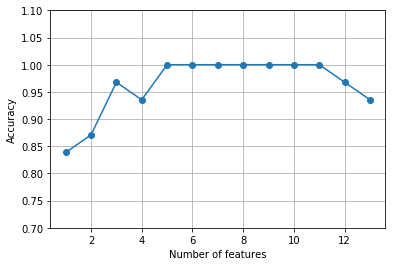

In [62]:
# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid(); plt.show()

In [65]:
# sbs.subsets_[8] 데이터에서 5개 feature 의 부분 열 색인을 계산
# feature 를 wine 이름으로 변환출력
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [66]:
# 원본 테스트 데이터에 대한 KNN 분류기 성능을 비교
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.944444444444


In [67]:
# SBS 로 축소한 데이터를 통한 KNN 분류기의 성능 비교
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.959677419355
Test accuracy: 0.962962962963
